In [1]:
intro_images_path='./Images/Intro_images/'
edge_images_path='../'#../Images/Edge_images/'
seg_images_path='../'#../Images/Seg_images/'
feature_images_path='../'#../Images/Feature_images/'
output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2022/23


<img src="./Logotipo_Solo.png" width=200/>

## Image Processing

- Arithmetic and logical operation
- Histogram equalization
- Convolution
- Correlation
- Image pyramids
- Template matching



http://szeliski.org/Book/

### Image difference 

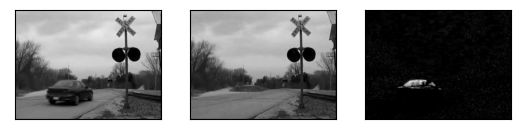

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

bg = cv2.imread(intro_images_path+'background.png',0)
fg = cv2.imread(intro_images_path+'foreground.png',0)

motion =np.absolute(cv2.subtract(fg,bg))

plt.subplot(131), plt.imshow(fg, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(bg,'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(motion, 'gray')
plt.xticks([]), plt.yticks([])
#plt.subplot(224), plt.plot(hist_full)
plt.show()

### Exercise Histogram Equalization in OpenCV

https://docs.opencv.org/3.4.2/d5/daf/tutorial_py_histogram_equalization.html

OpenCV has a function to do this, cv2.equalizeHist(). Its input is just a grayscale image and output is its histogram equalized image. You can take different images with different light conditions, equalize them and check the results.

Histogram equalization is good when the histogram of an image is confined to a particular region. It doesn’t work on images where both bright and dark pixels are present. In these cases and adaptive equalization is more convinient.


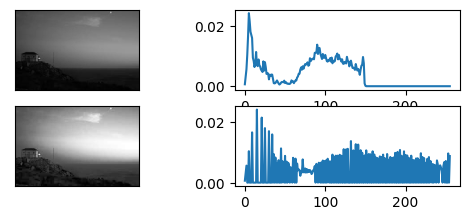

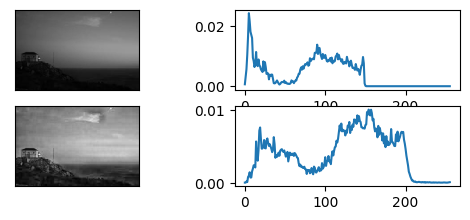

In [3]:
img = cv2.imread(intro_images_path+'fisterra_gray.jpg',0)
equ = cv2.equalizeHist(img)
#res = np.hstack((img,equ)) #stacking images side-by-side
#cv2.imwrite('fisterra_gray_eq.png',res)
plt.subplot(421), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(423), plt.imshow(equ,'gray')
plt.xticks([]), plt.yticks([])

hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_norm=hist/img.size
plt.subplot(422), plt.plot(hist_norm)
hist = cv2.calcHist([equ],[0],None,[256],[0,256])
hist_norm=hist/equ.size
plt.subplot(424), plt.plot(hist_norm)

plt.show()

plt.subplot(425), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([]) 
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_norm=hist/img.size
plt.subplot(426), plt.plot(hist_norm)

#Adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))
cl1 = clahe.apply(img)
plt.subplot(427), plt.imshow(cl1,'gray')
plt.xticks([]), plt.yticks([]) 

hist = cv2.calcHist([cl1],[0],None,[256],[0,256])
hist_norm=hist/cl1.size
plt.subplot(428), plt.plot(hist_norm)

plt.show()

## Convolution and Correlation

### Convolution filtering

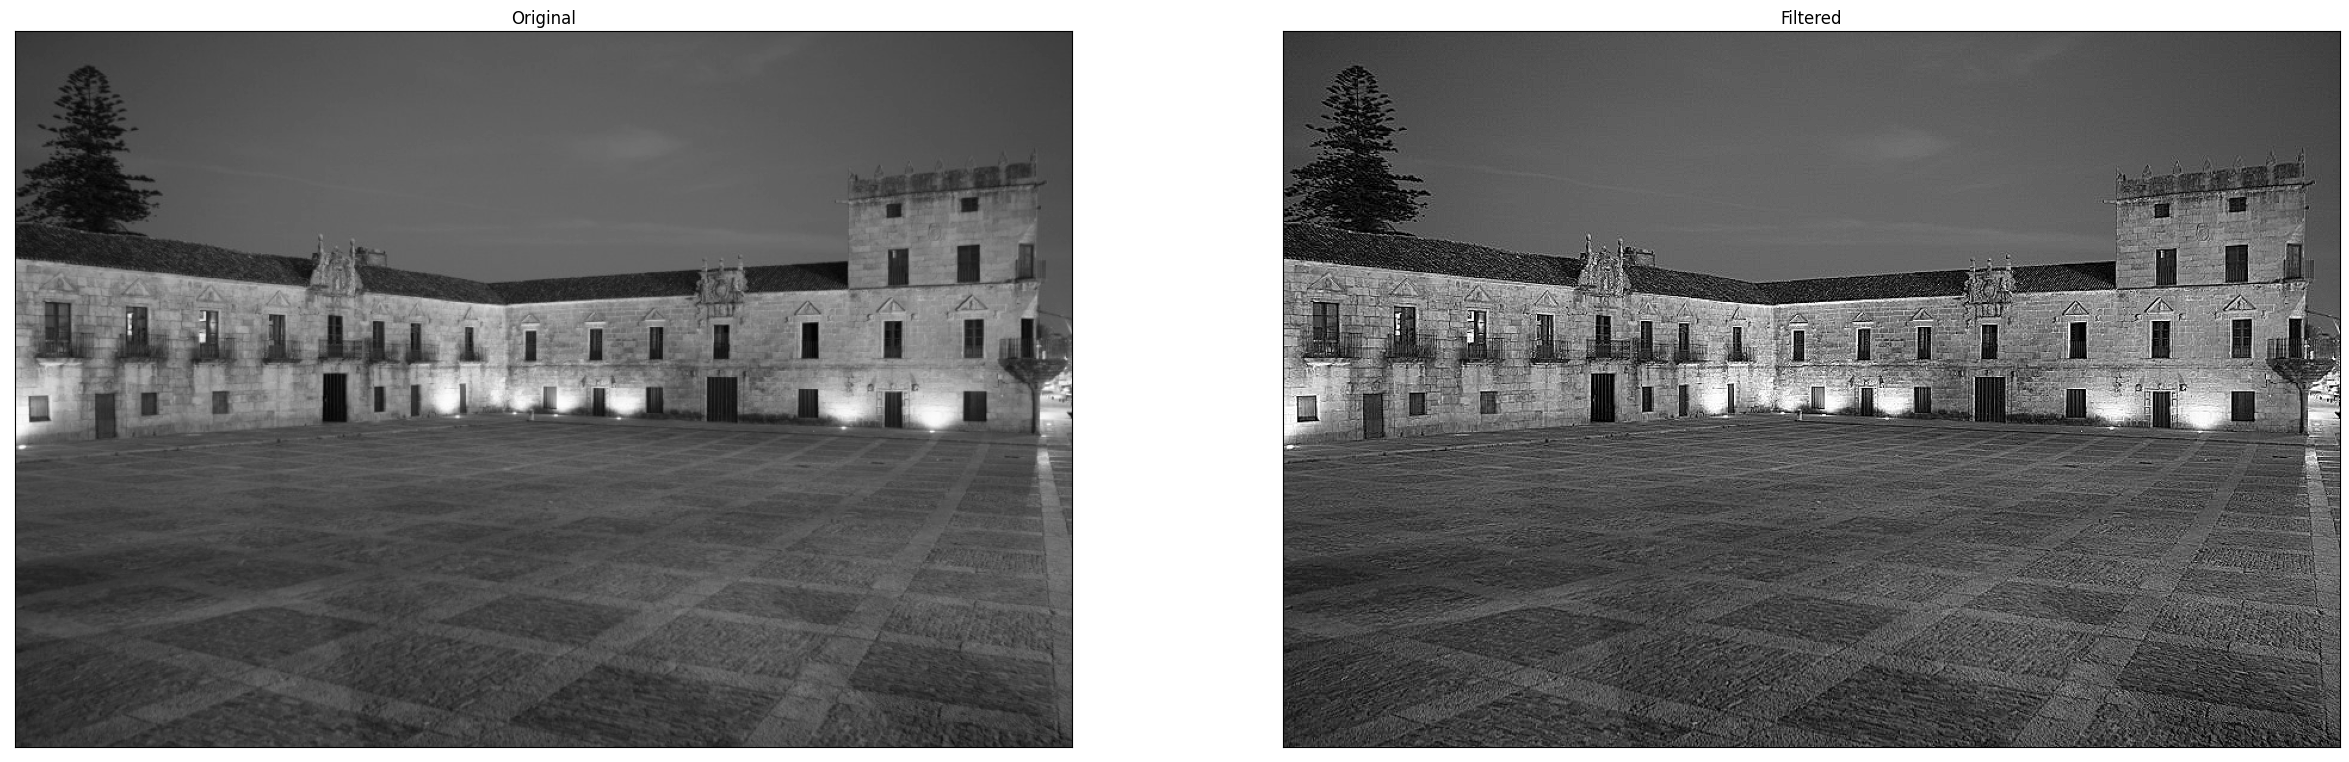

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'pazo.jpg',0)
kernel = np.array([[0, -1, 0], [-1, 5, -1],[0, -1,0]]) 
dst = cv2.filter2D(img,0,kernel)

plt.figure(figsize= (0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(121),plt.imshow(img,'gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,'gray'), plt.title('Filtered')
plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imwrite('pazo.jpg',img)


### Convolution for image smoothing (blurring)

Image blurring is achieved by convolving the image with a low-pass filter kernel taht removes high frequency content (eg: noise, edges). Edges are blurred a little bit in this operation. There are several blurring techniques:

***Mean filtering:***

The idea of mean filtering is simply to replace each pixel value in an image with the mean value of its neighbors, including itself. 
This is done in by convolving an image with a normalized box filter. Opencv provide us with the function **cv.blur()**, which takes the width and height of the kernel as parameters. A 3x3 normalized box filter would look like the below:

    K=[[1/9 1/9 1/9],
       [1/9 1/9 1/9],
       [1/9 1/9 1/9]]
       
 ***Gaussian average***

In Gaussian Blur operation, the image is convolved with a Gaussian filter instead of the box filter. Opencv provide us with the **GaussianBlur(src, dst, ksize, sigma)** method, which accepts the following parameters −

    src − input image

    dst − output image)

    ksize − size of the kernel.

    sigmaX − Gaussian kernel standard deviation in X and Y directions.


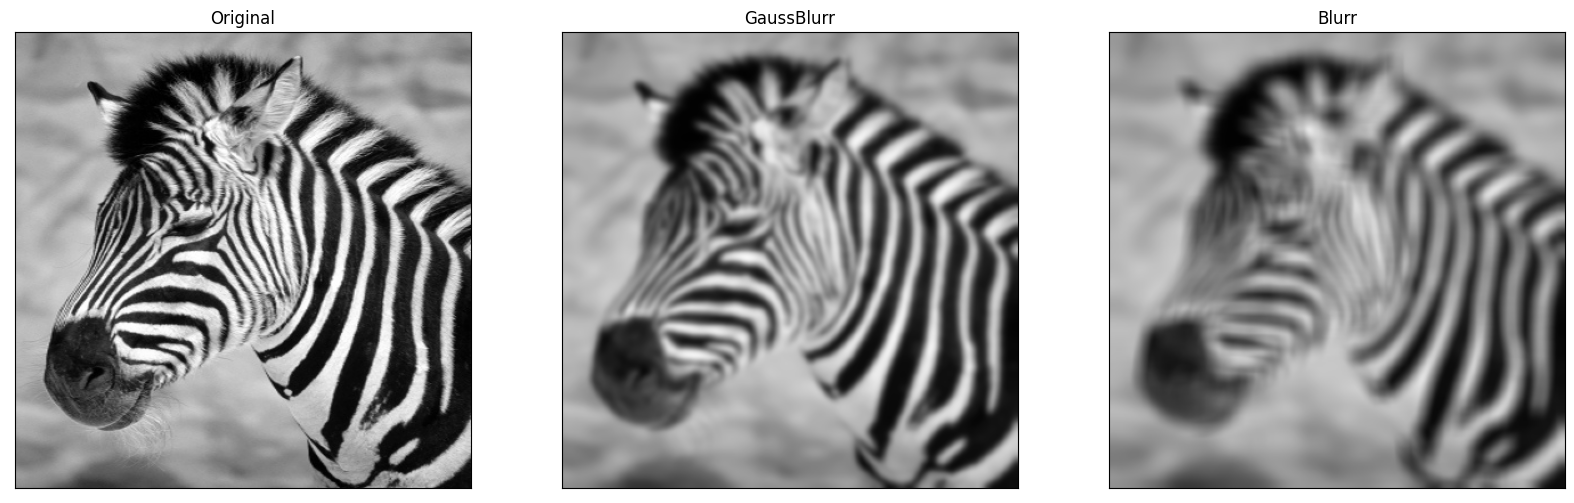

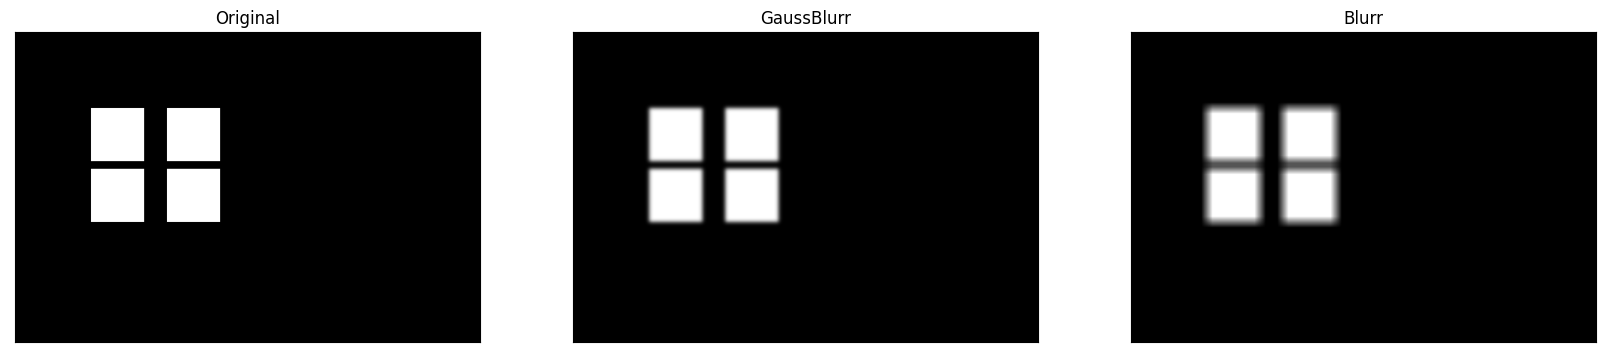

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'zebra.jpg')

blur1 = cv2.GaussianBlur(img,(15,15),0)
blur2 = cv2.blur(img,(15,15))

plt.figure(figsize= (0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur1,'gray'),plt.title('GaussBlurr')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2),plt.title('Blurr')
plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('zebragb.jpg',blur1)
cv2.imwrite('zebrab.jpg',blur2)

img = cv2.imread(intro_images_path+'gate.jpg')

img2 = np.zeros(img.shape[:2], np.uint8)
img2[100:170, 100:170] = 255
img2[180:250, 100:170] = 255
img2[100:170, 200:270] = 255
img2[180:250, 200:270] = 255
blur1 = cv2.GaussianBlur(img2,(15,15),0)
blur2 = cv2.blur(img2,(15,15))

plt.figure(figsize= (0.05*img2.shape[0],0.05*img2.shape[1]))
plt.subplot(131),plt.imshow(img2,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur1,'gray'),plt.title('GaussBlurr')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2,'gray'),plt.title('Blurr')
plt.xticks([]), plt.yticks([])
plt.show()

### Correlation filtering

**Exercise: Template Matching**
https://docs.opencv.org/3.4.2/d4/dc6/tutorial_py_template_matching.html

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv2.matchTemplate() for this purpose. It simply slides the template image (T) over the input image (I), as in 2D correlation, and compares the template against each patch of the input image to give the image (R). Several comparison methods are implemented in OpenCV. They return a grayscale image (R), where each pixel denotes how much does the neighbourhood of that pixel match with template.

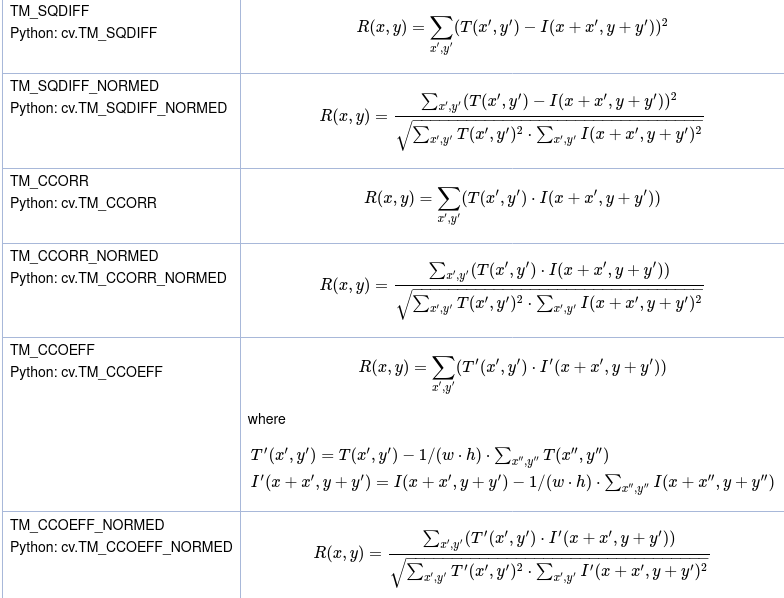


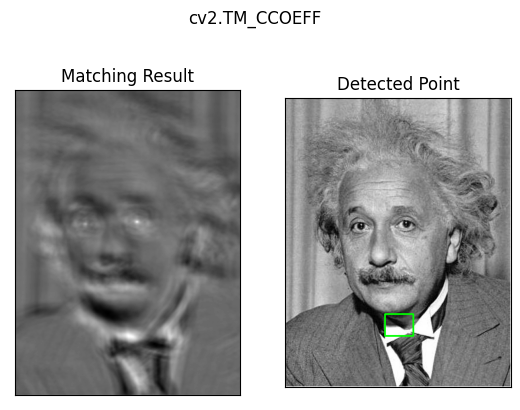

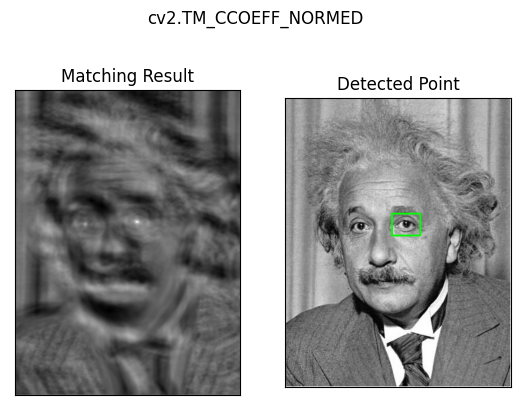

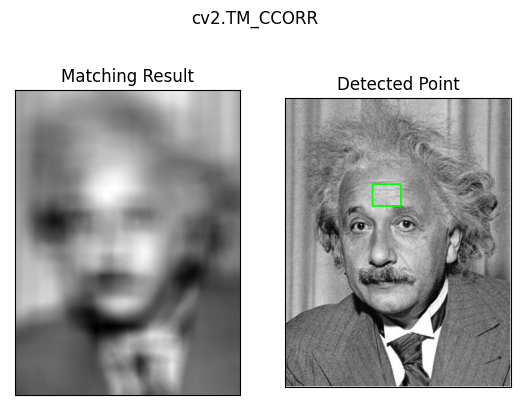

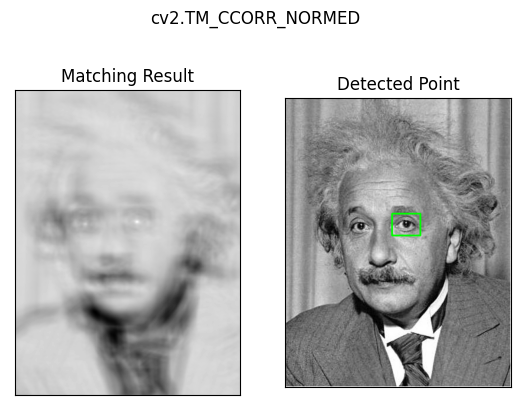

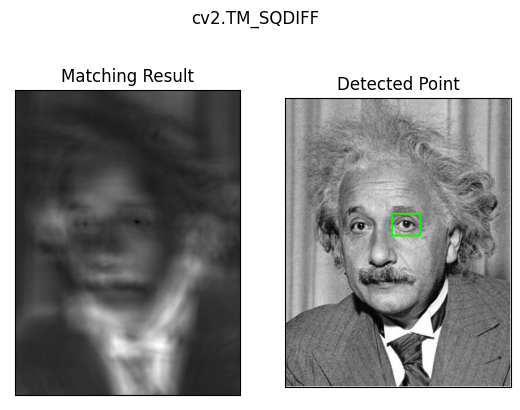

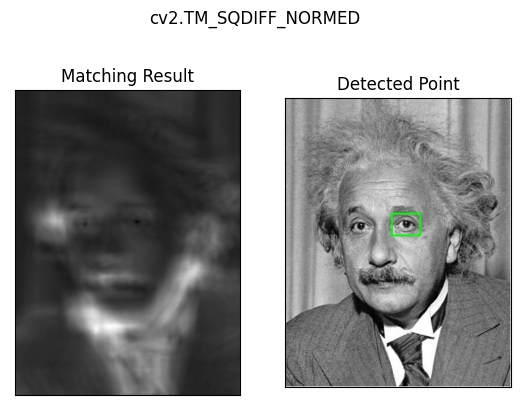

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'einstein.jpg',0)
img2 = img.copy()
template = cv2.imread(intro_images_path+'einstein_eye.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h) # CAREFULL BAD IDENTATION. IF WAS INSIDE THE ELSE STATEMENT WILL CRASH DEPENDING OF THE ORDER OF THE METHODS

    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.rectangle(img,top_left, bottom_right, [0,255,0], 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    if method in [cv2.TM_CCOEFF_NORMED]:
      res=(res-min_val)/(max_val-min_val)*255
      cv2.imwrite('einstein_ccoeff_normed.jpg',res)

## Image Pyramids


An image pyramid is a collection of images usually obtained by downsampling a single original image. It is a set of layers in which the higher the layer, the smaller the size.


Image pyramids are used to achieve scale-invariant processing in contexts as the following:
- template matching
- interest point detection
- object detection


http://szeliski.org/Book/



### Gaussian pyramid

The basic steps in building a Gaussian image pyramid are:
- Gaussian smooth the image
- Reduce image dimensions by half by discarding every other row and and every other column
- Repeat this process until desired numbers levels are achieved or the image size reached a minimun




#### Exercise

Comparison between pyramids with and without smoothing prior to downscaling

(491, 383)


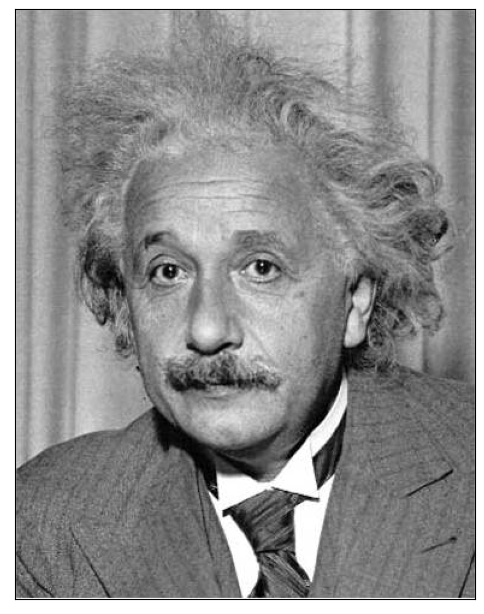

(246, 192)


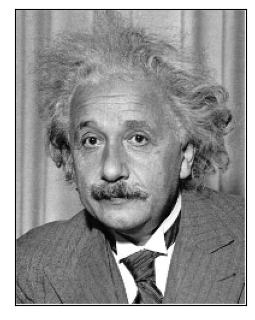

(123, 96)


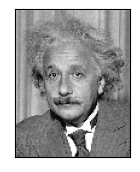

(62, 48)


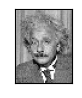

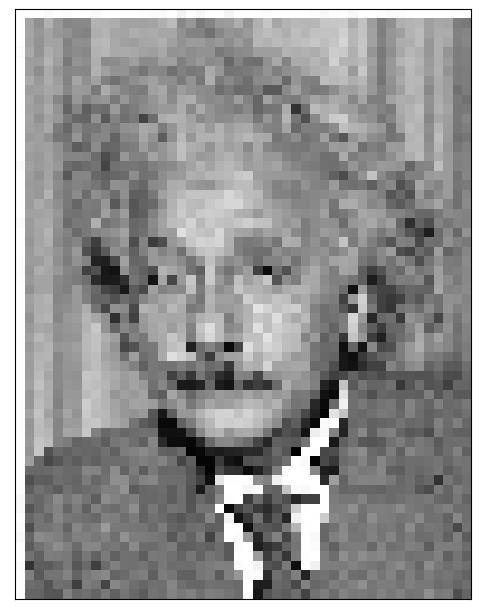

(491, 383)


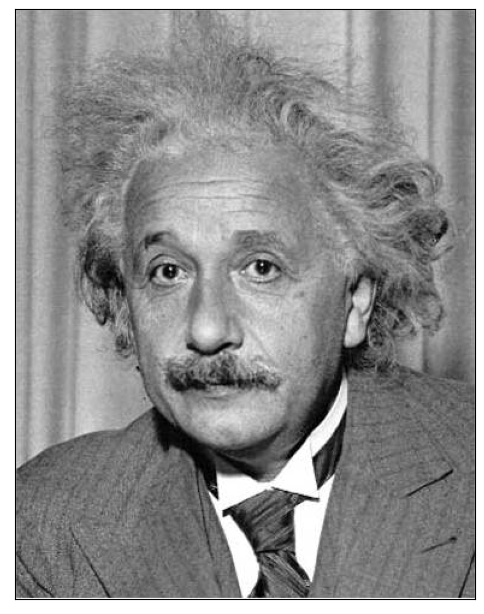

(246, 192)


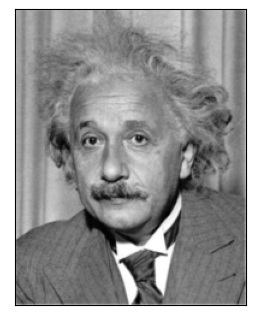

(123, 96)


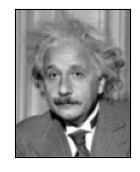

(62, 48)


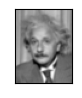

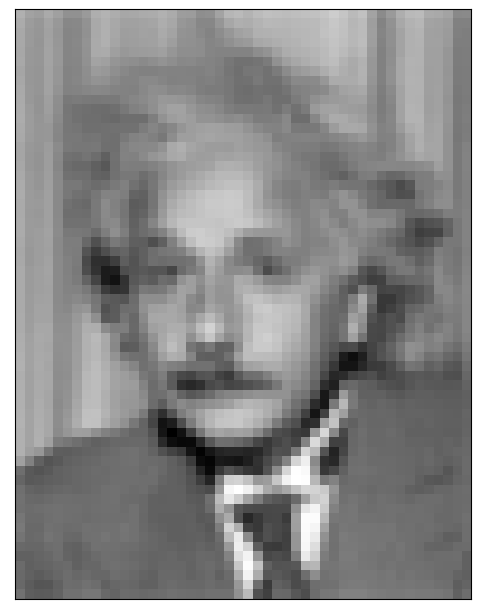

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def pyramid_bf(image, l=5, minSizex=8, minSizey=8):
    # yield the original image
    level = 0
    yield image
    # keep looping over the pyramid
    while True:
        if level == l or image.shape[0] < minSizex or image.shape[1] < minSizey:
            break
        h, w = image.shape[:2]
        image = image[:h+1:2, :w+1:2]
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        # yield the next image in the pyramid
        yield image
        level = level+1

def pyramid_sm(image, l=5, minSizex=8, minSizey=8):
    level = 0
    yield image
    while True:
        if level == l or image.shape[0] < minSizex or image.shape[1] < minSizey:
            break
        image = cv2.GaussianBlur(image, (5, 5), 0)
        h, w = image.shape[:2]
        image = image[:h+1:2, :w+1:2]

        yield image
        level = level+1

image = cv2.imread(intro_images_path + 'einstein.jpg', 0)  # 'aliasing.jpg',0)#

for layer in pyramid_bf(image, l=3):
    print(layer.shape)
    plt.figure(figsize=(0.02*layer.shape[0], 0.02*layer.shape[1]))
    plt.imshow(layer, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

plt.figure(figsize=(0.02*image.shape[0], 0.02*image.shape[1]))
plt.imshow(layer, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

for layer in pyramid_sm(image, l=3):
    print(layer.shape)
    plt.figure(figsize=(0.02*layer.shape[0], 0.02*layer.shape[1]))
    plt.imshow(layer, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

plt.figure(figsize=(0.02*image.shape[0], 0.02*image.shape[1]))
plt.imshow(layer, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


**Opencv function**

OpenCV has a specific function to downscale images:

(491, 383)


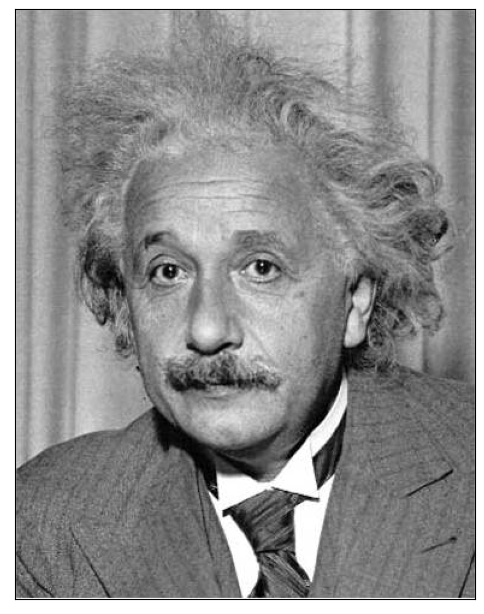

(491, 383)
(246, 192)


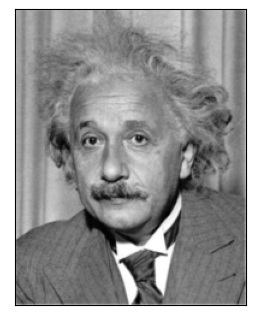

(123, 96)


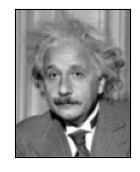

(62, 48)


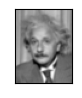

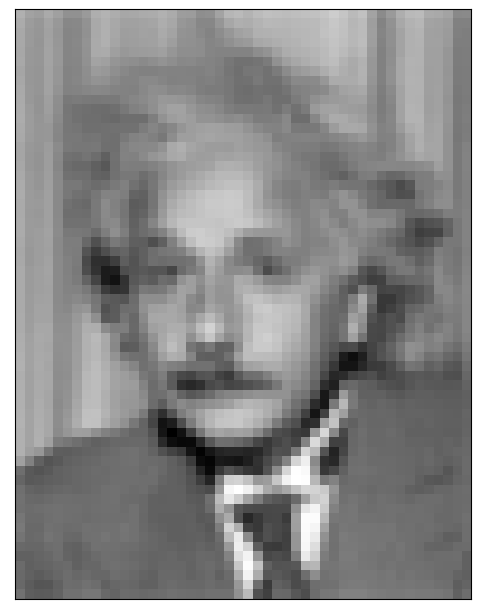

In [8]:
def pyramid(layer, l=4, minSizex=8, minSizey=8):
    level=0
    yield layer
    print(layer.shape)
    while True:
        layer = cv2.pyrDown(layer)
        if level== l or layer.shape[0]<minSizex or layer.shape[1]<minSizey:
            break
        yield layer
        level=level+1
        
for layer in pyramid(image, l=3):
  print(layer.shape)
  plt.figure(figsize= (0.02*layer.shape[0],0.02*layer.shape[1]))
  plt.imshow(layer,cmap='gray')
  plt.xticks([]), plt.yticks([]) 
  plt.show()

plt.figure(figsize= (0.02*image.shape[0],0.02*image.shape[1]))
plt.imshow(layer,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()


### Example of application: Template Matching

https://docs.opencv.org/3.4.2/d4/dc6/tutorial_py_template_matching.html

Template Matching is a method for searching and finding the location of a template image in a larger image. In order to cope with different sizes of the occurrence of the template we can take advantage of image pyramid.



### EXERCISE: Template matching and Gaussian pyramid

Based on the exercises about template matching and the construction of Gaussian pyramids try to detect as much tunas as posible in the image Tuna_Relative_Sizes.jpg given the template in Tuna_template.jpg.

Image shape: (3564, 2971)
Template original shape: (312, 703)
Template resized shape: (1248, 2812)
Reduce step: 0.7937005259840998
Posible detections: 60
Posible detections: 652
Posible detections: 291
Posible detections: 206
Posible detections: 133
Posible detections: 389
Posible detections: 11


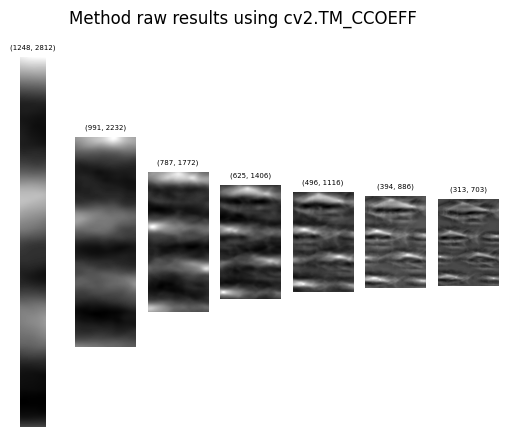

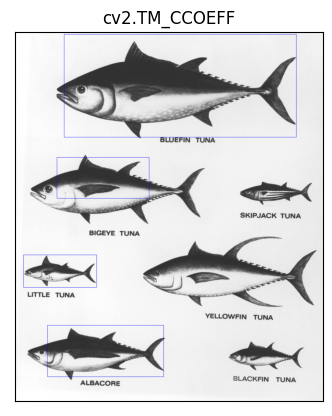

Posible detections: 47
Posible detections: 626
Posible detections: 286
Posible detections: 210
Posible detections: 164
Posible detections: 98
Posible detections: 11


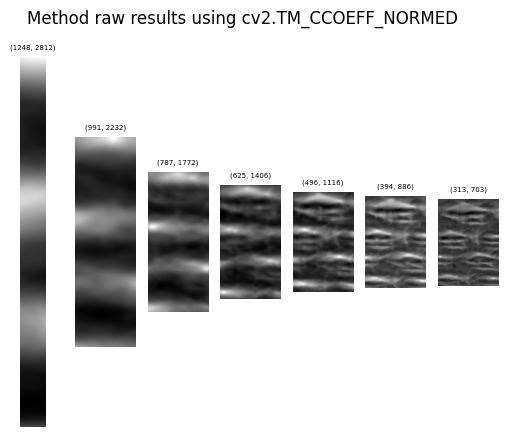

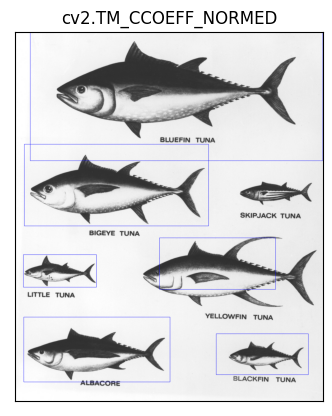

Posible detections: 14059
Posible detections: 1283
Posible detections: 26386
Posible detections: 11323
Posible detections: 33745
Posible detections: 64390
Posible detections: 95991


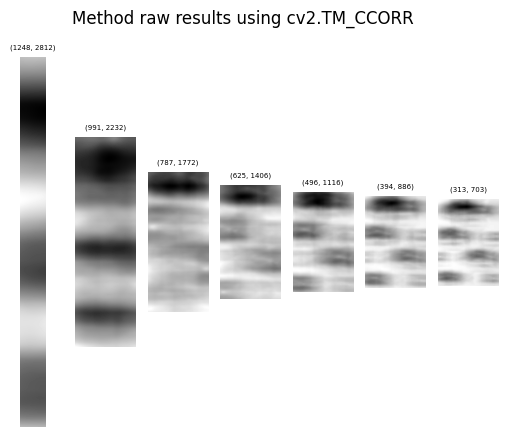

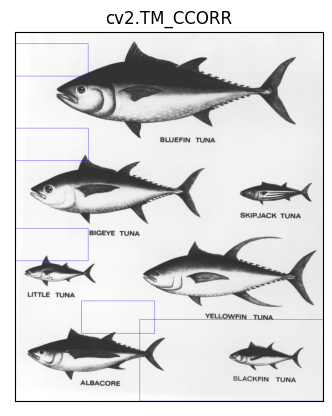

Posible detections: 21557
Posible detections: 5198
Posible detections: 4803
Posible detections: 2433
Posible detections: 4404
Posible detections: 7228
Posible detections: 157


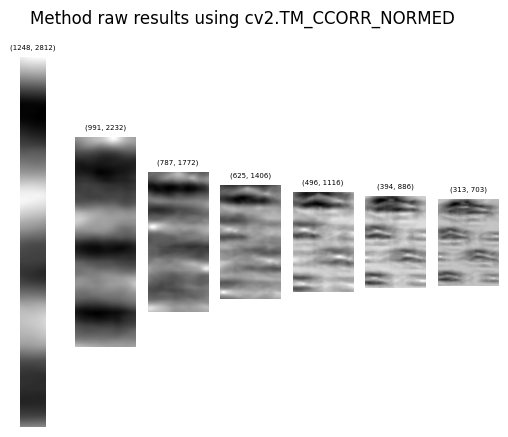

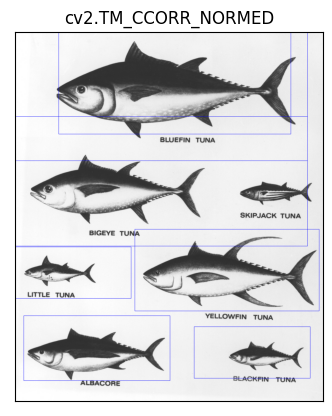

Posible detections: 44
Posible detections: 151
Posible detections: 79
Posible detections: 49
Posible detections: 75
Posible detections: 47
Posible detections: 1


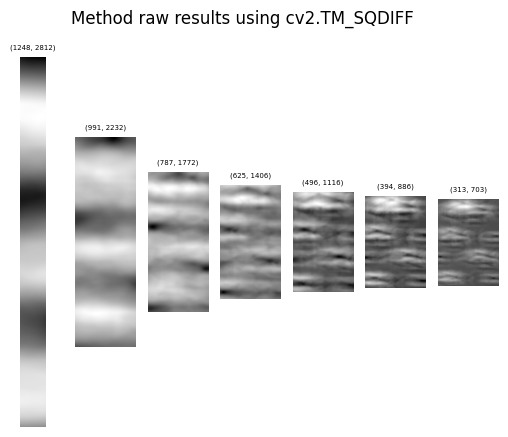

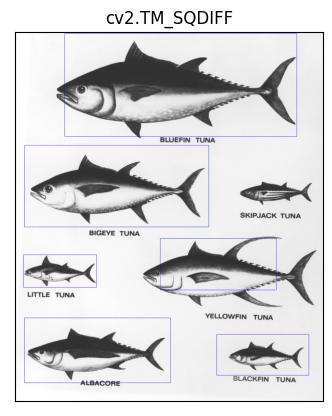

Posible detections: 48
Posible detections: 151
Posible detections: 79
Posible detections: 50
Posible detections: 77
Posible detections: 47
Posible detections: 1


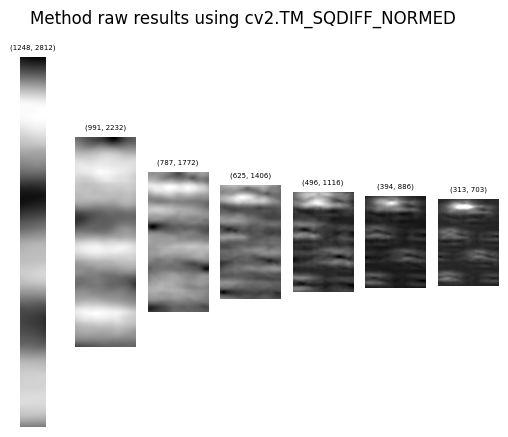

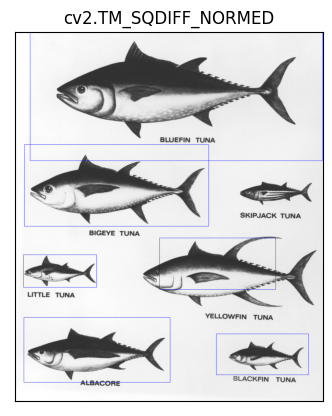

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

###################
#    Functions    #
###################

# Pyramid funtion that reduces an X% the size of the image
def pyramid(layer, l=4, minSizex=8, minSizey=8, reduce=0.5):
    level = 0
    yield layer
    while True:
        # Blur and reduce the image
        layer = cv2.GaussianBlur(layer, (5, 5), 0)
        layer = cv2.resize(layer, (0, 0), fx=reduce, fy=reduce)
        if level == l or layer.shape[0] < minSizex or layer.shape[1] < minSizey:
            break
        yield layer
        level = level+1

# Function that detects a template in an image
def pyramid_template_matching(img, template, meth, l=4, minSizex=8, minSizey=8, reduce=0.8, multiple_detection_threshold=0, nms_area=40, debug=False):
    res_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    detected_points = []
    # If debug is True, initialize the debug figure
    if debug:
        fig, axs = plt.subplots(1, l)
        fig.suptitle(f'Method raw results using {meth}')

    for i, templates in enumerate(pyramid(template, l, minSizex=minSizex, minSizey=minSizey, reduce=reduce)):
        method = eval(meth)
        h, w = templates.shape

        # Apply template Matching
        method_raw_res = cv2.matchTemplate(img, templates, method)

        # If debug is True, show method raw results
        if debug:
            axs[i].imshow(method_raw_res, cmap='gray')
            axs[i].set_title(f"{templates.shape}", fontsize=5)
            axs[i].axis('off')

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, lowest values
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            locations = np.where(method_raw_res <= (
                method_raw_res.min() * (1 + multiple_detection_threshold)))
        else:
            locations = np.where(method_raw_res >= (
                method_raw_res.max() * (1 - multiple_detection_threshold)))

        if debug:
            print(f"Posible detections: {len(locations[0])}")

        # Apply non-maximum supression
        for pt in zip(*locations[::-1]):
            similar_points = [(p,s,l) for (p,s,l) in detected_points if math.dist(p, pt) < nms_area]

            # If there are no similar points, add the current point
            if len(similar_points) == 0:
                detected_points.append((pt, method_raw_res[pt[1], pt[0]] , (w, h)))
                
            # If there are similar points, check if the current point is better
            else:
                lower_similar_points = [(p,s,l) for (p,s,l) in similar_points if p[1] < method_raw_res[pt[1], pt[0]]] 
                if lower_similar_points != []:
                    detected_points = [p for p in detected_points if p not in lower_similar_points]
                    detected_points.append((pt, method_raw_res[pt[1], pt[0]] , (w, h)))
  
    if debug:
        plt.show()

    for pt,_,(w,h) in detected_points:
        cv2.rectangle(res_img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

    return res_img


###################
#    Execution    #
###################

# Load images
img = cv2.imread(intro_images_path+'Tuna_Relative_Sizes.jpg',cv2.IMREAD_GRAYSCALE)
template = cv2.imread(intro_images_path+'Tuna_template.jpg', cv2.IMREAD_GRAYSCALE)
minSizex, minSizey = template.shape[:2]
print(f"Image shape: {img.shape}")
print(f"Template original shape: {template.shape}")

# Make template 4 times bigger
scale_to = 4
template = cv2.resize(template, (0, 0), fx=scale_to, fy=scale_to, interpolation=cv2.INTER_CUBIC)
print(f"Template resized shape: {template.shape}")

# Set reduce layers and step size
l = 7
reduce_step = (1/scale_to)**(1/(l-1)) # To obtain the original shape in the last reduce step
print(f"Reduce step: {reduce_step}")

# Run
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    result = pyramid_template_matching(img, template, meth, l=l, minSizex=minSizex-20, minSizey=minSizey-20, reduce=reduce_step, multiple_detection_threshold=0.01, nms_area=400, debug=True)
    # Plot
    plt.plot()
    plt.imshow(result, cmap='gray')
    plt.title(meth)
    plt.xticks([])
    plt.yticks([])
    plt.show()


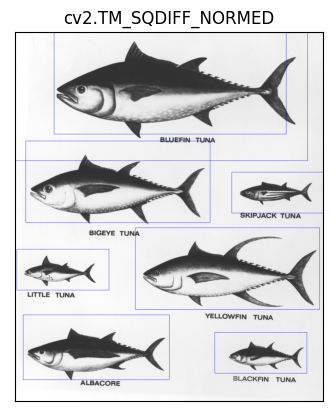

In [13]:
# Best method and parameters
result = pyramid_template_matching(img, template, 'cv2.TM_CCOEFF_NORMED', l=l, minSizex=minSizex-20, minSizey=minSizey-20, reduce=reduce_step, multiple_detection_threshold=0.19, nms_area=500, debug=False)

plt.plot()
plt.imshow(result, cmap='gray')
plt.title(meth)
plt.xticks([])
plt.yticks([])
plt.show()